In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from IPython.display import Audio, display
from scipy import signal
from scipy.io import wavfile
from skimage.feature import peak_local_max
%matplotlib inline

In [2]:
rate, song_array = wavfile.read('Katy_Perry.wav')
rate2, song_array2 = wavfile.read('Daft_Punk.wav')

In [3]:
spec, freqs, t = mlab.specgram(song_array, NFFT=4096, Fs=44100, noverlap=2048)
spec2, freqs2, t2 = mlab.specgram(song_array2, NFFT=4096, Fs=44100, noverlap=2048)

In [4]:
Z = 10.0 * np.log10(spec)
Z = np.flipud(Z)

xextent = 0, np.amax(t)
xmin, xmax = xextent
extent = xmin, xmax, freqs[0], freqs[-1]

/Users/kronos/miniconda3/envs/nyc15/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


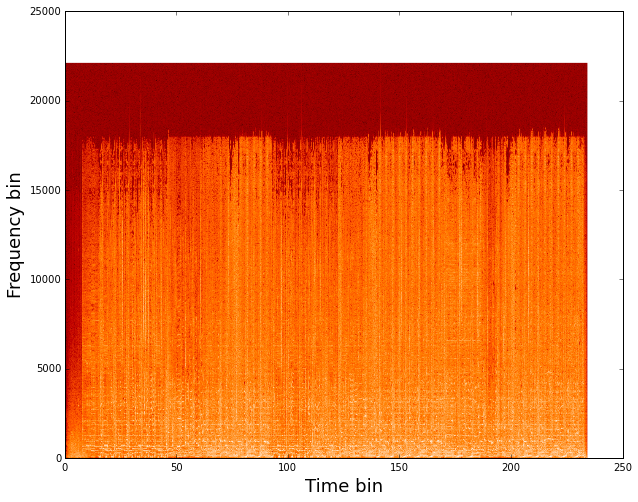

In [5]:
fig1 = plt.figure(figsize=(10, 8), facecolor='white')
plt.imshow(Z, cmap='gist_heat', extent=extent)
axes = plt.gca()
plt.xlabel('Time bin', fontsize=18)
plt.ylabel('Frequency bin', fontsize=18)
plt.axis('auto')
plt.show()

In [6]:
minfreq = 50
maxfreq = 15000

spec = spec[(freqs >= minfreq) & (freqs <= maxfreq)]
freqs = freqs[(freqs >= minfreq) & (freqs <= maxfreq)]

spec2 = spec2[(freqs2 >= minfreq) & (freqs2 <= maxfreq)]
freqs2 = freqs2[(freqs2 >= minfreq) & (freqs2 <= maxfreq)]

Z = 10.0 * np.log10(spec)
Z = np.flipud(Z)

Z2 = 10.0 * np.log10(spec2)
Z2 = np.flipud(Z2)

/Users/kronos/miniconda3/envs/nyc15/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log10
/Users/kronos/miniconda3/envs/nyc15/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log10


In [7]:
coordinates = peak_local_max(Z, min_distance=20, threshold_abs=30)
coordinates2 = peak_local_max(Z2, min_distance=20, threshold_abs=30)

/Users/kronos/miniconda3/envs/nyc15/lib/python3.5/site-packages/skimage/feature/peak.py:135: RuntimeWarning: invalid value encountered in multiply
  image *= mask


/Users/kronos/miniconda3/envs/nyc15/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


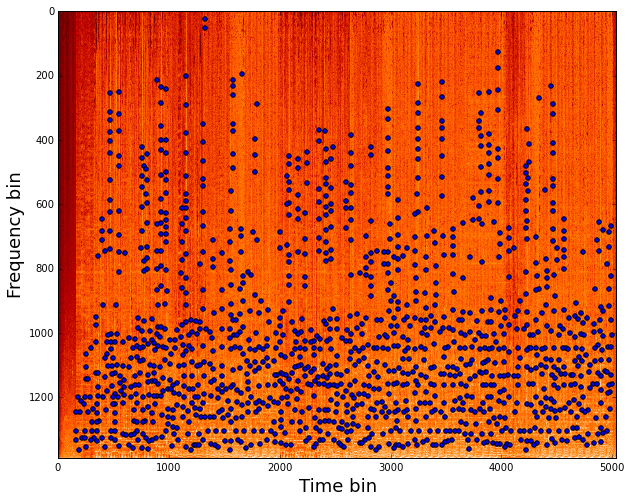

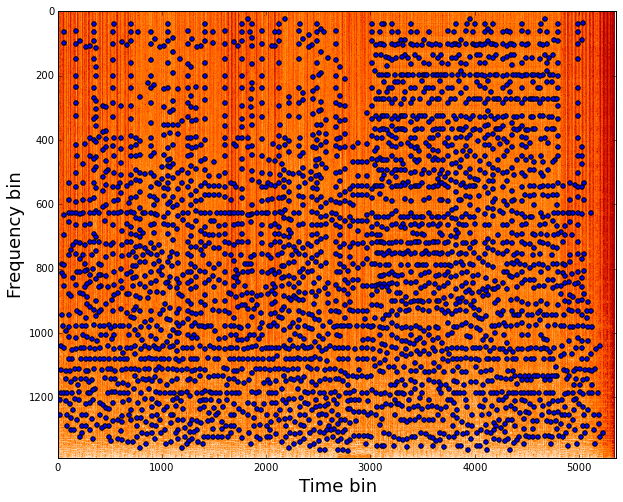

In [8]:
fig1 = plt.figure(figsize=(10, 8), facecolor='white')
plt.imshow(Z, cmap='gist_heat')
plt.scatter(coordinates[:, 1], coordinates[:, 0])
axes = plt.gca()
plt.xlabel('Time bin', fontsize=18)
plt.ylabel('Frequency bin', fontsize=18)
plt.axis('auto')
axes.set_xlim([0, len(t)])
axes.set_ylim([len(freqs), 0])

fig2 = plt.figure(figsize=(10, 8), facecolor='white')
plt.imshow(Z2, cmap='gist_heat')
plt.scatter(coordinates2[:, 1], coordinates2[:, 0])
axes = plt.gca()
plt.xlabel('Time bin', fontsize=18)
plt.ylabel('Frequency bin', fontsize=18)
plt.axis('auto')
axes.set_xlim([0, len(t2)])
axes.set_ylim([len(freqs2), 0])

plt.show()